# Canciones mas escuchadas Spotify 2023


# 1.- Objetivos del analisis

- Análisis musical: explore patrones en funciones de audio para comprender tendencias y preferencias en canciones populares.
- Comparación de plataformas: compare la popularidad de la canción en diferentes plataformas de música.
- Impacto del artista: analice cómo la participación y los atributos del artista se relacionan con el éxito de una canción.
- Tendencias temporales: identifique cualquier cambio en los atributos y preferencias musicales a lo largo del tiempo.
- Presencia multiplataforma: investigue cómo funcionan las canciones en diferentes servicios de transmisión.

# 1.1.- Sobre el conjunto de datos
Este conjunto de datos contiene una lista completa de las canciones más famosas de 2023 enumeradas en Spotify. El conjunto de datos ofrece una gran cantidad de características más allá de las que normalmente están disponibles en conjuntos de datos similares. Proporciona información sobre los atributos, la popularidad y la presencia de cada canción en varias plataformas de música. El conjunto de datos incluye información como el nombre de la pista, el nombre del artista, la fecha de lanzamiento, las listas de reproducción y gráficos de Spotify, estadísticas de transmisión, presencia de Apple Music, presencia de Deezer, gráficos de Shazam y varias funciones de audio.

- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

# 2.- Una primera mirada

In [2]:
# Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura
data = pd.read_csv('./../data/spotify2023.csv', encoding='latin-1')

In [4]:
print(data.shape)
data.head()

(953, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
# Vemos las variables categoricas y numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# 3.- Top 10 artistas mas escuchados

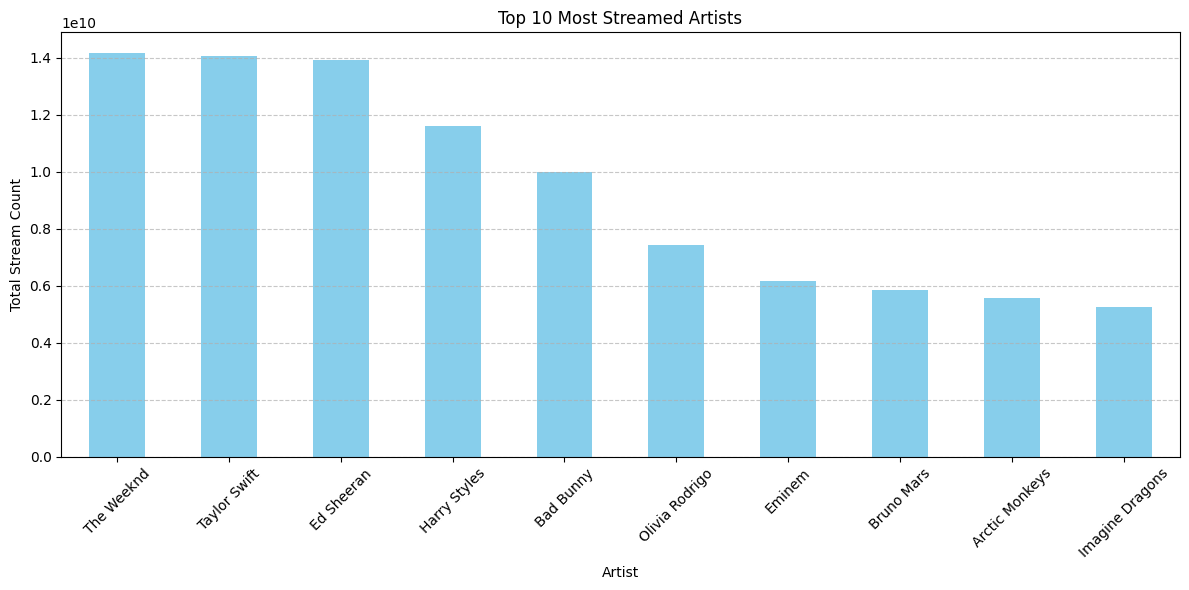

In [5]:
# A la columna streams la convertimos en entero y eliminamos valores incorrectos
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
# A la columna streams le adicionamos a los elementos eliminados elementos vacios
data['streams'] = data['streams'].replace([np.inf, -np.inf], np.nan)
# Creamos una tabla con el nombre de los artistas y el numero de streams
artist_streams = data.groupby('artist(s)_name')['streams'].sum() 
# Ordenar los streams de mayor a menor
artist_streams = artist_streams.sort_values(ascending=False) 

top_n = 10
top_artists = artist_streams.head(top_n)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Total Stream Count')
plt.title(f'Top {top_n} Most Streamed Artists')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    object 
 14  bpm                   953 non-null    int64  
 15  key                   8

In [ ]:
#sptf.iloc[300]
streams_num = sptf.streams.str.split(expand=True)
sptf['Reproducciones'] = streams_num[0]
sptf1 = sptf[['Reproducciones','track_name']]
valor = str('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3')
sptf[sptf['Reproducciones'] == valor]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Reproducciones
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,BPM110KeyAModeMajorDanceability53Valence75Ener...


In [10]:
problem = data.loc[574]
problem

track_name              Love Grows (Where My Rosemary Goes)
artist(s)_name                            Edison Lighthouse
artist_count                                              1
released_year                                          1970
released_month                                            1
released_day                                              1
in_spotify_playlists                                   2877
in_spotify_charts                                         0
streams                                                 NaN
in_apple_playlists                                       16
in_apple_charts                                           0
in_deezer_playlists                                      54
in_deezer_charts                                          0
in_shazam_charts                                          0
bpm                                                     110
key                                                       A
mode                                    

In [ ]:
for value in sptf1['streams']:
    print(value)

In [ ]:
data.drop([574],axis=0, inplace=True)


In [ ]:
sptf['streamss'] = sptf['streams'].apply(lambda x : float(x))

In [ ]:
sptf['ReproduccionesMillon'] = sptf['Reproducciones']/1000000
sptf.ReproduccionesMillon

0      141.381703
1      133.716286
2      140.003974
3      800.840817
4      303.236322
          ...    
948     91.473363
949    121.871870
950     73.513683
951    133.895612
952     96.007391
Name: ReproduccionesMillon, Length: 952, dtype: float64

In [9]:
moda = data.streams.mode()
promedio = data.streams.mean().round(0)
mediana = data.streams.median()
menor = data.streams.min()
mayor = data.streams.max()

print('Moda:\n',moda)
print('Promedio de streams:', promedio)
print('Mediana:',mediana)
print('Pista con menos reproducciones:', menor)
print('Pista con mas reproducciones:', mayor)

Moda:
 0    1.563386e+08
1    3.955914e+08
2    7.238945e+08
3    1.223481e+09
Name: streams, dtype: float64
Promedio de streams: 514137425.0
Mediana: 290530915.0
Pista con menos reproducciones: 2762.0
Pista con mas reproducciones: 3703895074.0


In [ ]:
problem['Reproducciones']


'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'

In [ ]:
sptf['in_spotify_playlists'].max()


52898

In [ ]:
type(problem)

pandas.core.series.Series